In [18]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)
import torch
import torch.nn.functional as F


def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    # ax = plt.subplot(111)
    # for i in range(X.shape[0]):
        # plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(y[i] / 10.), fontdict={'weight': 'bold', 'size': 9})

    shown_images = np.array([[1., 1.]])  # just something big
    for i in range(X.shape[0]):
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        # if np.min(dist) < 4e-3:
        #     # don't show points that are too close
        #     continue
        if np.max(dist) > 4e-3:
            # don't show points that are too far
            continue
        shown_images = np.r_[shown_images, [X[i]]]
    plt.xticks([]), plt.yticks([])
    plt.title(title)
    time_str = time.strftime("%Y%m%d") + time.strftime("_%H%M%S")
    plt.savefig("runtime/" + time_str + ".png")
    plt.show()


'''
三种方法
'''


def tSNE(X, y, title):
    print("Computing t-SNE embedding")
    # tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
    tsne = manifold.TSNE()
    X_tsne = tsne.fit_transform(X)
    plot_embedding(X_tsne, y, "tSNE" + title)
    return X_tsne


def MDS(X, y, title):
    print("Computing MDS embedding")
    clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
    X_mds = clf.fit_transform(X)
    plot_embedding(X_mds, y, "MDS" + title)
    return X_mds


def RandomForest(X, y, title):
    print("Computing Totally Random Trees embedding")
    hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0, max_depth=5)
    X_transformed = hasher.fit_transform(X)
    pca = decomposition.TruncatedSVD(n_components=2)
    X_reduced = pca.fit_transform(X_transformed)
    plot_embedding(X_reduced, y, "RandomForest" + title)
    return X_reduced



Computing t-SNE embedding


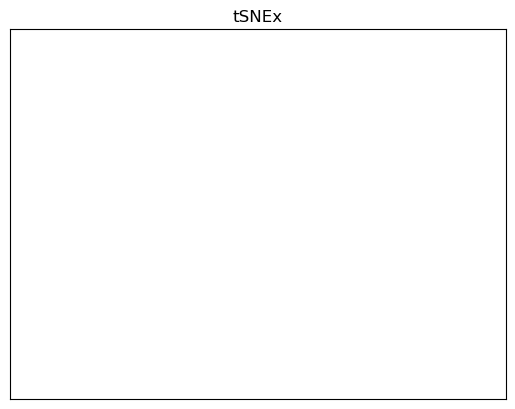

In [19]:
# 加载数据
mnist = np.load('runtime/mnist.npz')
x_test, y_test = mnist['x_test'], mnist['y_test']
x_test = torch.tensor((x_test.reshape(x_test.shape[0], 784).astype('float32')) / 255.0)
#x_test = torch.tensor(x_test.reshape(x_test.shape[0], 1, 28, 28) / 255.0)

# 加载模型
# model = torch.load('mnist.pth')

# 得到预测结果，也可以改为取参数得到中间层特征
# pred = torch.tensor(model(x_test.float()))

# 用MDS方法可视化测试集数据分布、预测结果分布
# MDS(x_test, y_test, "x")
# MDS(pred, y_test, "pred")

# 用tSNE方法
X_tsne = tSNE(x_test,y_test,'x')



# 用RandomForest方法
# RandomForest(x_test,y_test,'x')

In [21]:
X_tsne.shape


(10000, 2)

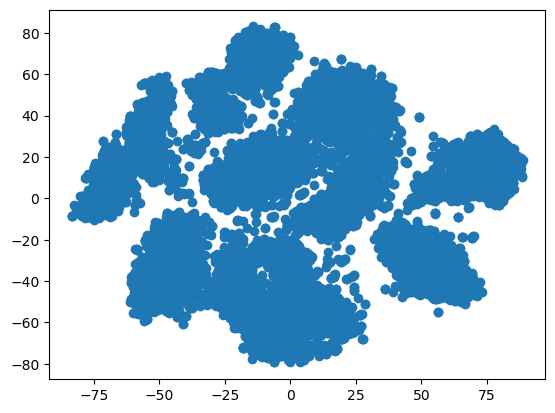

In [22]:
plt.scatter(X_tsne[:,0],X_tsne[:,1])

In [1]:
import torch
from util.eval_res import MakaEval

pth = "runtime/OSTR_C2J_DTA_Only_MTH/eval_res/TKHMTH2200_spindle_ori_vs_v8_TKHMTH2200_127.pt"

res:MakaEval = torch.load(pth)


In [9]:
print(len(res.all_gts))

char_n_map = {}
for line in res.all_gts:
    for char in line:
        if char not in char_n_map:
            char_n_map[char] = 0
        char_n_map[char]  += 1
aa = sorted(char_n_map.items(), key=lambda kv:(kv[1], kv[0]))
aa.reverse()


25262


In [19]:
stsa = torch.load("runtime/OSTR_C2J_DTA_Only_MTH/statis_res/TKHMTH2200_spindle_v10_TKHMTH2200__E127/16.pt")
stsa2 = torch.load("runtime/OSTR_C2J_DTA_Only_MTH/statis_res/TKHMTH2200_spindle_v8_TKHMTH2200__E127/16.pt")


In [20]:
print(stsa[0]['label'][:6])
print(stsa2[0]['label'][:6])


['令所獲福倍復増長憍尸迦是善男子善女', '人等由此三千大千丗界并餘十方無邊丗', '界所有四大王衆天三十三天夜摩天覩史', '多天樂變化天他化自在天梵衆天梵輔天', '梵㑹天大梵天光天少光天無量光天極光', '淨天淨天少淨天無量淨天遍淨天廣天少']
['令所獲福倍復増長憍尸迦是善男子善女', '人等由此三千大千丗界并餘十方無邊丗', '界所有四大王衆天三十三天夜摩天覩史', '多天樂變化天他化自在天梵衆天梵輔天', '梵㑹天大梵天光天少光天無量光天極光', '淨天淨天少淨天無量淨天遍淨天廣天少']


In [22]:
print(stsa[0]['logits'][0].shape)

(128, 40, 4421)
